In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/food-security/SNAP_history_1969_2019.csv
/kaggle/input/food-security/SNAP_FY2010_FY2020/FY13.xls
/kaggle/input/food-security/SNAP_FY2010_FY2020/FY11.xls
/kaggle/input/food-security/SNAP_FY2010_FY2020/FY16.xls
/kaggle/input/food-security/SNAP_FY2010_FY2020/FY15.xls
/kaggle/input/food-security/SNAP_FY2010_FY2020/FY10.xls
/kaggle/input/food-security/SNAP_FY2010_FY2020/FY14.xls
/kaggle/input/food-security/SNAP_FY2010_FY2020/FY12.xls
/kaggle/input/food-security/SNAP_FY2010_FY2020/FY20.xls
/kaggle/input/food-security/SNAP_FY2010_FY2020/FY17.xls
/kaggle/input/food-security/SNAP_FY2010_FY2020/FY18.xls
/kaggle/input/food-security/SNAP_FY2010_FY2020/FY19.xls


In [2]:
#Import modules for visualisation
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from IPython.display import Image
# Ignore warnings
import warnings 
warnings.filterwarnings("ignore")


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#Dataset reading
df = pd.read_csv('/kaggle/input/food-security/SNAP_history_1969_2019.csv')
df.head()

,Fiscal Year,Average Participation,Average Benefit Per Person,Total Benefits(M),Other Costs,Total Costs(M)
0,1969,"2,878",6.63,228.80,21.70,250.50
1,1970,"4,340",10.55,549.70,27.20,576.90
2,1971,"9,368",13.55,"1,522.70",53.20,"1,575.90"
3,1972,"11,109",13.48,"1,797.30",69.40,"1,866.70"
4,1973,"12,166",14.60,"2,131.40",76.00,"2,207.40"


In [4]:
#Null values and types in data
nb = pd.Series(df.isna().sum(),name ='NaN_cnt')
pr = pd.Series(df.isna().sum()/len(df),name='NaN_%')
display(pd.concat([nb,pr],axis =1))
print('\n')
cols = df.columns.tolist()
data_types =[]
for i in cols:
    data_types.append({i:type(df[i].loc[0])})
display(data_types)

,NaN_cnt,NaN_%
Fiscal Year,0,0.0
Average Participation,0,0.0
Average Benefit Per Person,0,0.0
Total Benefits(M),0,0.0
Other Costs,0,0.0
Total Costs(M),0,0.0


[{'Fiscal Year': str},
 {'Average Participation': str},
 {'Average Benefit Per Person': numpy.float64},
 {'Total Benefits(M)': str},
 {'Other Costs': str},
 {'Total Costs(M)': str}]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Fiscal Year                 51 non-null     object 
 1   Average Participation       51 non-null     object 
 2   Average Benefit Per Person  51 non-null     float64
 3   Total Benefits(M)           51 non-null     object 
 4   Other Costs                 51 non-null     object 
 5   Total Costs(M)              51 non-null     object 
dtypes: float64(1), object(5)
memory usage: 2.5+ KB


There are no null values in the data, but the numeric columns are not in the correct format. So let's change those string values to the proper format.

## Data cleaning

In [6]:
df_clean = df.copy()

In [7]:
def reformat_col(df,col):
    if type(df[col].loc[0]) != np.float64:
        df1 = df[col].apply(lambda x:x.split(',')[0])
        try:
            df2 = df[col].apply(lambda x:x.split(',')[1])
            df[col] = (df1+df2).astype(float)
        except:
            df[col] = df1.astype(float)
    return display({col:type(df[col].loc[0])})

In [8]:
display(df_clean[u'Fiscal Year'].unique())
#There is a issue with the report of 1982 fiscal year
df_clean[u'Fiscal Year']= (df_clean[u'Fiscal Year'].apply(lambda x:x.split(' ')[0])).astype(int)
cols_to_reformat =['Average Participation','Total Benefits(M)','Other Costs','Total Costs(M)']
for col in cols_to_reformat:
    reformat_col(df_clean,col)

array(['1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982 3]', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019'], dtype=object)

{'Average Participation': numpy.float64}

{'Total Benefits(M)': numpy.float64}

{'Other Costs': numpy.float64}

{'Total Costs(M)': numpy.float64}

In [9]:
df_clean.describe()

,Fiscal Year,Average Participation,Average Benefit Per Person,Total Benefits(M),Other Costs,Total Costs(M)
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,1994.000000,24544.725490,69.163725,39.813725,127.713725,42.615686
std,14.866069,11048.205089,39.653545,81.408570,247.364592,85.887709
min,1969.000000,2878.000000,6.630000,1.000000,1.000000,1.000000
25%,1981.500000,18366.000000,39.330000,10.000000,2.000000,11.000000
50%,1994.000000,21625.000000,69.000000,18.000000,3.000000,20.000000
75%,2006.500000,27230.500000,95.465000,42.000000,72.700000,45.000000
max,2019.000000,47636.000000,133.850000,549.700000,959.600000,576.900000


## Exploration Data Analysis

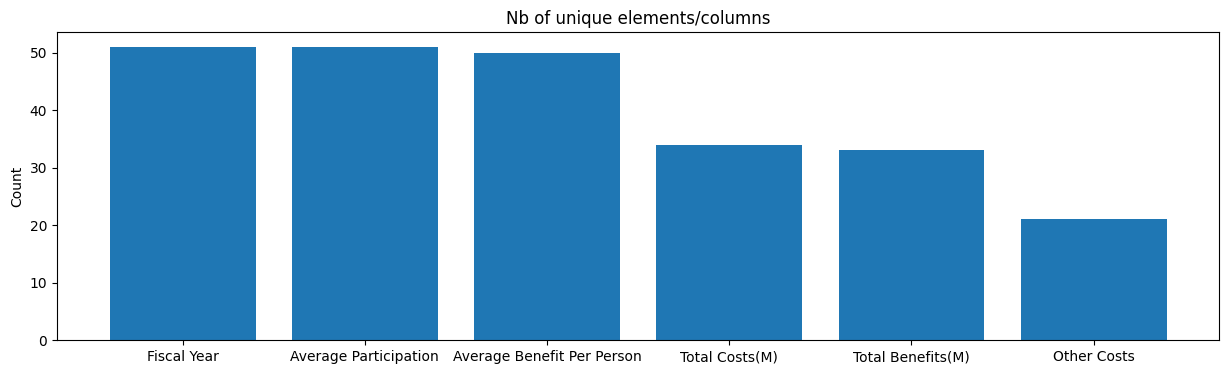



 Unique elements/columns


,Number,Percentage
Fiscal Year,51,1.000000
Average Participation,51,1.000000
Average Benefit Per Person,50,0.980392
Total Costs(M),34,0.666667
Total Benefits(M),33,0.647059
Other Costs,21,0.411765


In [10]:
t = df_clean.nunique().sort_values(ascending =False)
plt.figure(figsize =(15,4))
plt.title('Nb of unique elements/columns')
plt.ylabel('Count')
plt.bar(t.index,t.values)
plt.show()
nb = pd.Series(t,name ='Number')
pr = pd.Series(t/len(df_clean), name  ='Percentage')
print('\n\n Unique elements/columns')
display(pd.concat([nb,pr],axis =1))
print('\n\n')

In [11]:
df_clean.duplicated().sum()

0

All columns are numerical.

**Discrete**
- Fiscal Year
- Average Participation
- Total Benefits(M)
- Other Costs
- Total Costs(M)

### Data distribution

array([[<AxesSubplot: title={'center': 'Average Participation'}>,
        <AxesSubplot: title={'center': 'Average Benefit Per Person'}>],
       [<AxesSubplot: title={'center': 'Total Benefits(M)'}>,
        <AxesSubplot: title={'center': 'Other Costs'}>],
       [<AxesSubplot: title={'center': 'Total Costs(M)'}>,
        <AxesSubplot: >]], dtype=object)

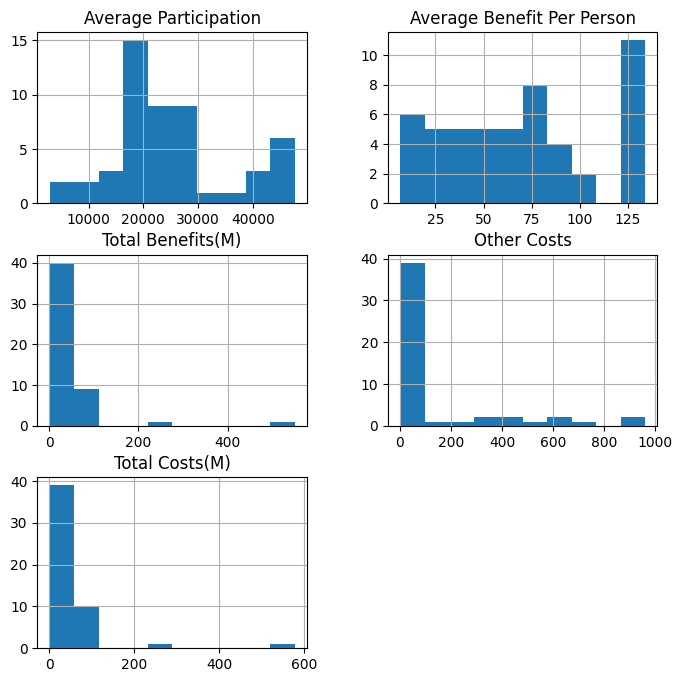

In [12]:
cols = df_clean.columns
df_clean[cols[1:]].hist(figsize=(8,8))

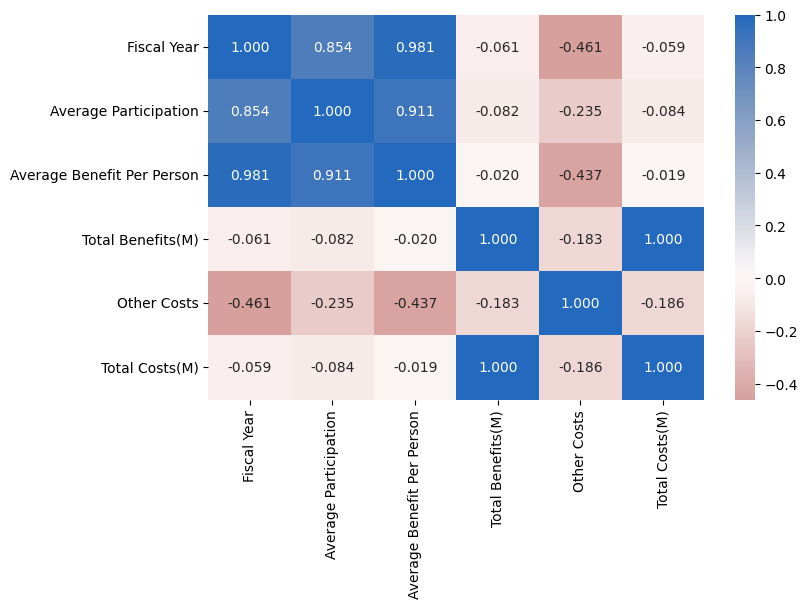

In [13]:
### Correlation plot 
plt.figure(figsize = [8, 5])
sb.heatmap(df_clean[df_clean.columns.tolist()].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

The Average participation is highly correlated to Fiscal Year(positively proportional) and to Average Benefit Per Person.
The other cost are negatively proportional to fiscal yearand moderately correlated to average Benefit Per Person.

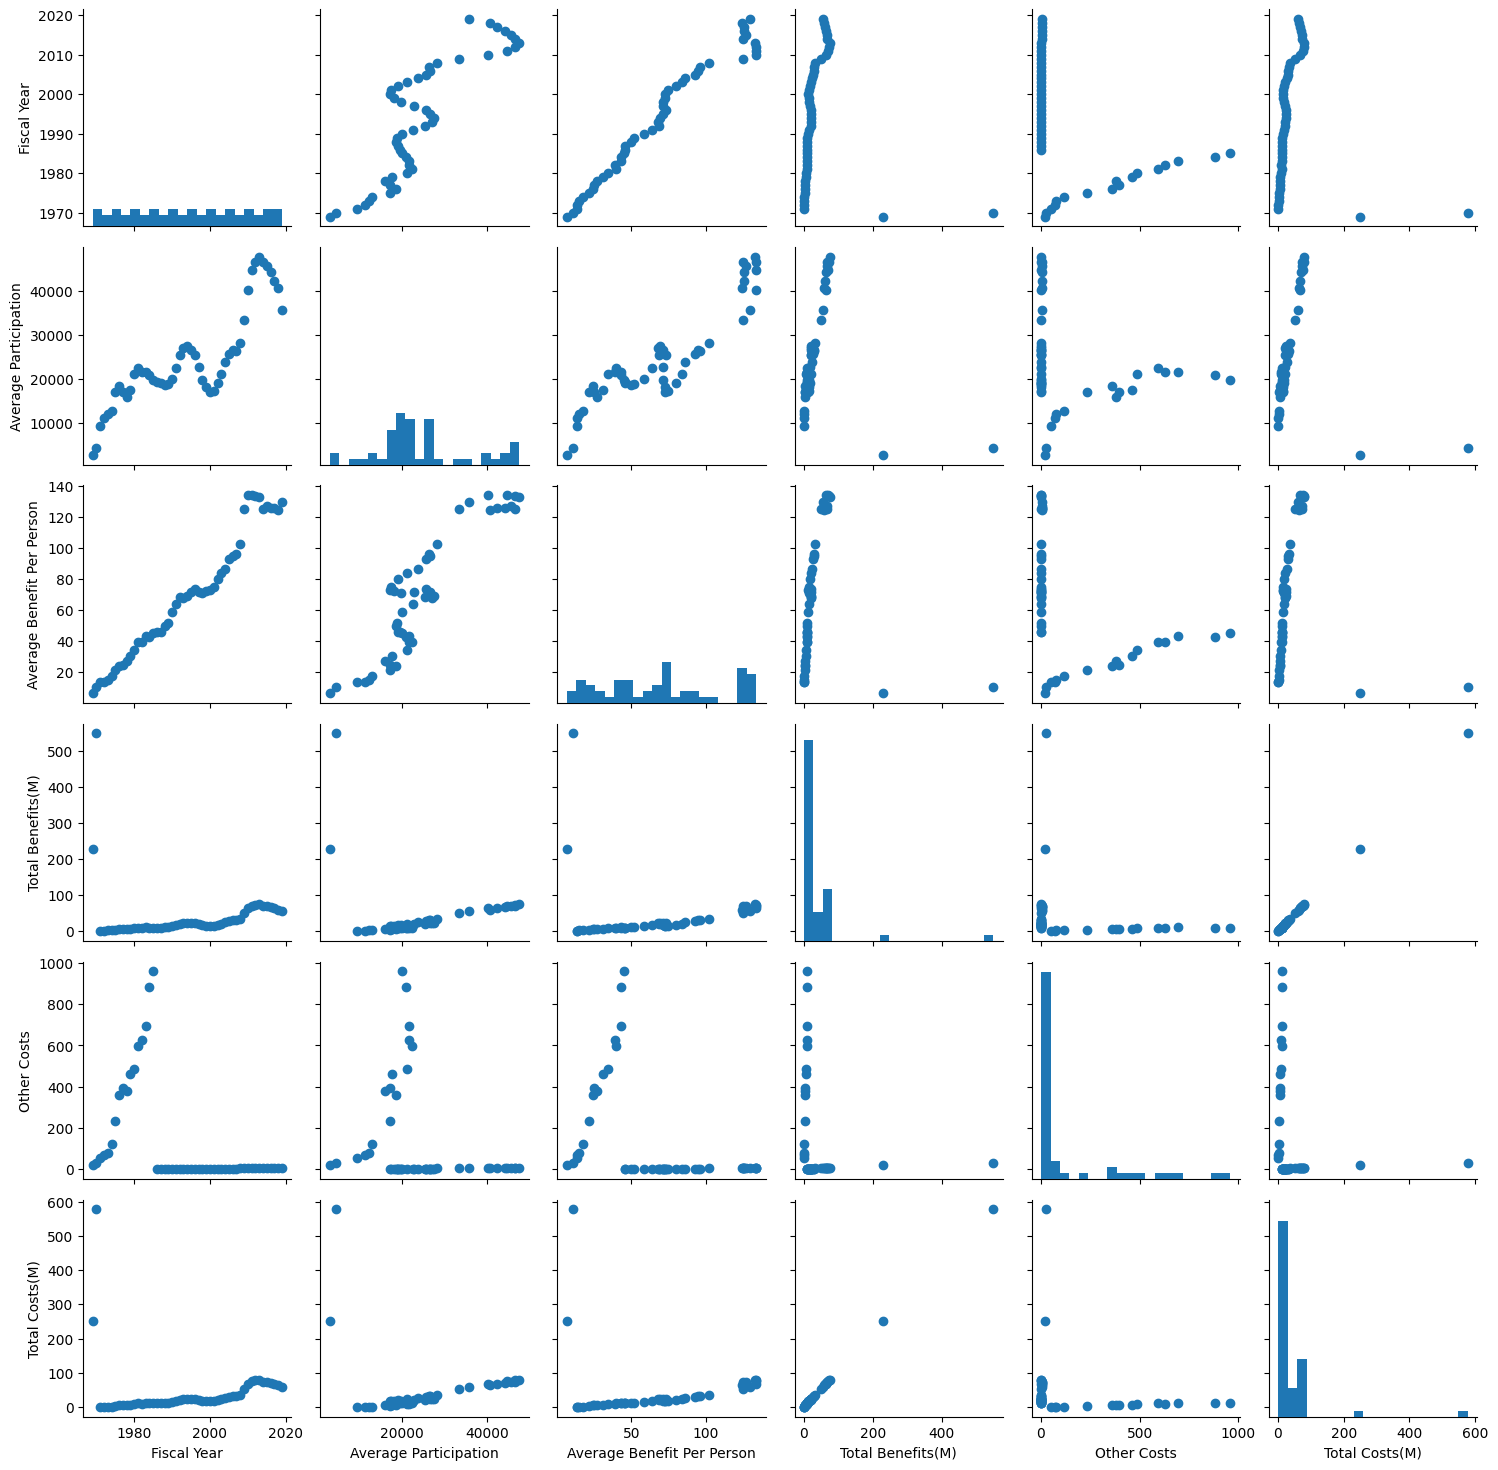

In [14]:
g = sb.PairGrid(data = df_clean, vars = df_clean.columns.tolist())
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

In [15]:
bivar_df = df_clean.groupby('Total Costs(M)').mean().sort_index(False).reset_index()
fig = px.line(df, x='Fiscal Year', y='Total Benefits(M)', color='Total Costs(M)', markers=True)
fig.show()


Each year, the average participation increases with the total benefit.